### Outline

The goal is to create a basic linear regression model using stricly NumPy. I will use Gradient Descent to estimate a prediction. I will also implement basic stochastic gradient descent and batch gradient descent.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ulrikthygepedersen/energy-efficiency")

print("Path to dataset files:", path)

ModuleNotFoundError: No module named 'kagglehub'

### Initialization / Definitions

In [ ]:
#get data
data = np.genfromtxt(
    "data/energy_efficiency.csv",
    delimiter=",",
    skip_header=1
)

In [ ]:
#initialize data
X = data[:, 0:8]
y = data[:, 8].reshape(-1, 1)

In [ ]:
# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [ ]:
# add intercept
Xb = np.c_[np.ones((X.shape[0], 1)), X]

In [ ]:
#initialize theta
theta = np.zeros((Xb.shape[1], 1))

In [ ]:
#h(theta)(x(i))
#m = number of training examples
htx = Xb @ theta
m = Xb.shape[0]

### Learning

In [ ]:
def mse_loss(Xb, y, theta):
   return np.mean((htx - y) ** 2)

In [ ]:
def mse_gradient(Xb, y, theta):
    return (2/m) * Xb.T @ (htx - y)

### Basic Fitting of the model

In [ ]:
# fitting the model
epochs = 10000
lr = 0.01
for epoch in range(epochs):
    theta = theta - lr * mse_gradient(Xb, y, theta)


In [ ]:
print(theta)

[[ 4461.4390625 ]
 [ 1254.95232618]
 [-1327.24790156]
 [  918.9645349 ]
 [-1738.07150233]
 [ 1793.73802083]
 [   -5.21679318]
 [  544.19688766]
 [  176.19829107]]


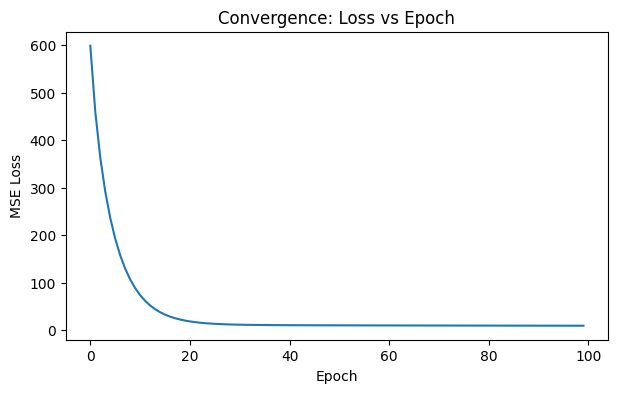

599.2906108802084
18.885636455055884
10.934144870191789
10.412307073095512
10.077355998578428


In [ ]:
def mse_loss(Xb, y, theta):
    htx = Xb @ theta
    return np.mean((htx - y) ** 2)

def mse_gradient(Xb, y, theta):
    m = Xb.shape[0]
    htx = Xb @ theta
    return (2 / m) * Xb.T @ (htx - y)

# theta init (make sure shapes match your Xb)
theta = np.zeros((Xb.shape[1], 1))

lr = 0.05
epochs = 100

loss_history = []

for epoch in range(epochs):
    loss_history.append(mse_loss(Xb, y, theta))
    grad = mse_gradient(Xb, y, theta)
    theta = theta - lr * grad

plt.figure(figsize=(7,4))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Convergence: Loss vs Epoch")
plt.show()
for i in range(0, len(loss_history), 20):
    print(float(loss_history[i]))

### Stochastic Gradient Descent

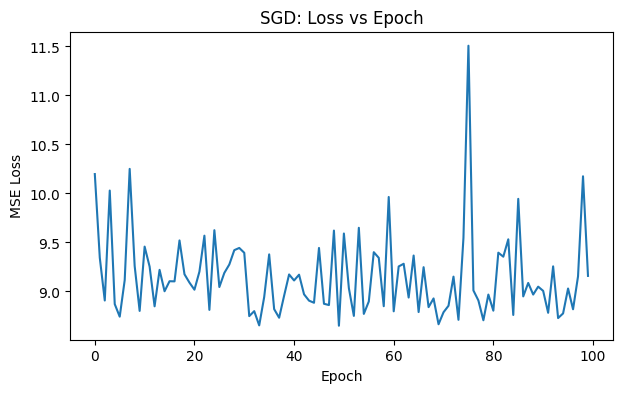

theta_sgd shape: (9, 1)
final loss: 9.158935519465388
Early avg loss: 124.63053679597553
Late avg loss: 9.980071075417055


In [ ]:
def mse_loss(Xb, y, theta):
    htx = Xb @ theta
    return np.mean((htx - y) ** 2)

def sgd(Xb, y, lr=0.01, epochs=100):
    n = Xb.shape[0]
    theta = np.zeros((Xb.shape[1], 1))
    rng = np.random.default_rng(0)

    loss_history = []

    for epoch in range(epochs):
        indices = rng.permutation(n) # grab a new random data point

        for i in indices:
            xi = Xb[i:i+1, :]      # (1, d+1)  |   get the ith x point
            yi = y[i:i+1, :]       # (1, 1)    |   get the ith y point

            htx_i = xi @ theta     # (1, 1) = h_theta(x^(i))

            theta = theta - lr * 2 * (htx_i - yi) * xi.T     # final equation

        loss_history.append(mse_loss(Xb, y, theta))

    return theta, loss_history

# Run SGD
theta_sgd, loss_hist_sgd = sgd(Xb, y)

plt.figure(figsize=(7,4))
plt.plot(loss_hist_sgd)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("SGD: Loss vs Epoch")
plt.show()

print("theta_sgd shape:", theta_sgd.shape)
print("final loss:", float(loss_hist_sgd[-1]))



# is it working?
early = np.mean(loss_history[:25])
late = np.mean(loss_history[-25:])

print("Early avg loss:", early)
print("Late avg loss:", late)

### Plotting points to visualize the gradient descent line

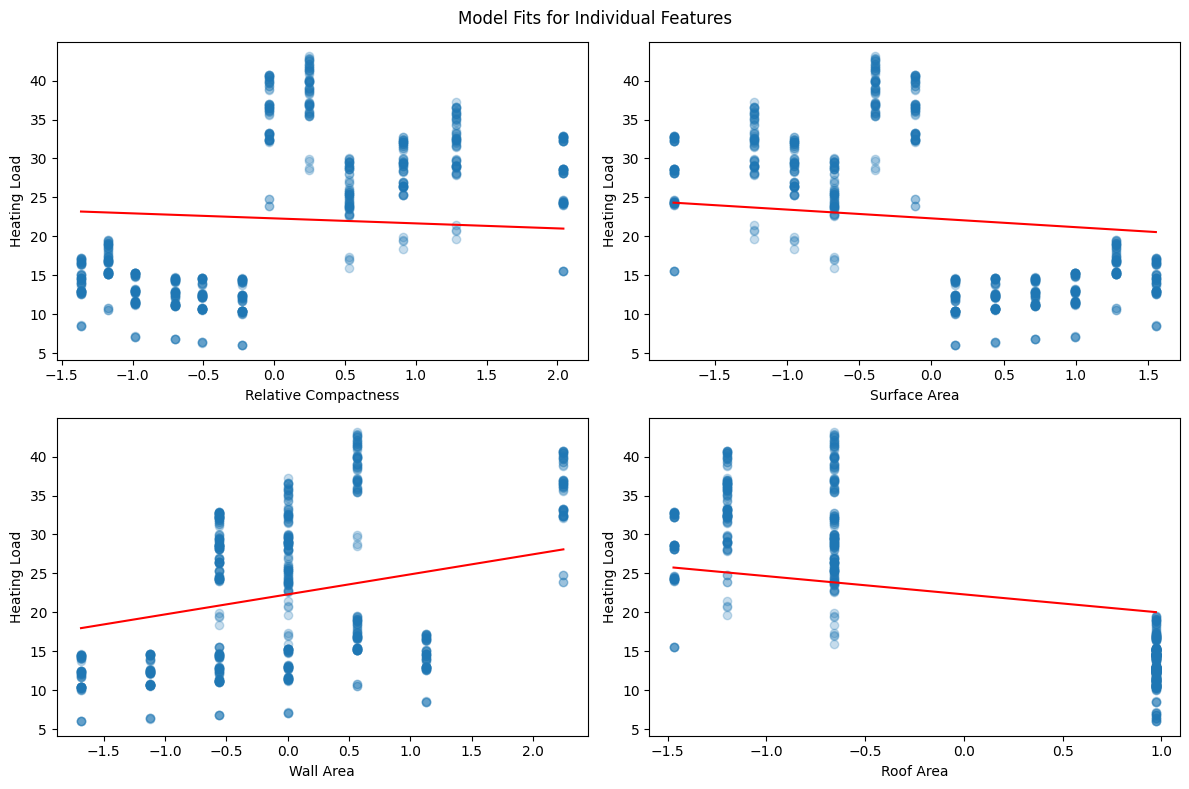

In [ ]:
feature_names = [
    "Relative Compactness",
    "Surface Area",
    "Wall Area",
    "Roof Area"
]

plt.figure(figsize=(12,8))

for idx, j in enumerate([0,1,2,3]):
    X_feat = X[:, j].reshape(-1, 1)

    x_line = np.linspace(X_feat.min(), X_feat.max(), 200).reshape(-1,1)
    Xb_line = np.zeros((len(x_line), Xb.shape[1]))
    Xb_line[:, 0] = 1
    Xb_line[:, j+1] = x_line[:,0]

    y_line = Xb_line @ theta

    plt.subplot(2,2,idx+1)
    plt.scatter(X_feat, y, alpha=0.25)
    plt.plot(x_line, y_line, color="red")
    plt.xlabel(feature_names[idx])
    plt.ylabel("Heating Load")

plt.suptitle("Model Fits for Individual Features")
plt.tight_layout()
plt.show()
